# Assignment 8: Neural Networks and Backpropagation
In this assignment, you will be asked to write your own code to implement the learning process of a simple neural network. We will use a simple version of [MNIST dataset](http://yann.lecun.com/exdb/mnist/), which we have introduced in Assignment 6. To make the problem simpler, we only take images with label '8' and '9', which gives us a binary classification problem. Then we subsample the dataset and reduce the dimension of each image using average pooling. The following code loads the dataset and prints its dimension.

Similar to Assignment 3, you will need to implement forward and back-propagation. We define the following terms:

$n$ - the dataset size. For the training set $n=964$

$d$ - feature dimension. In this dataset $d=196$

$X\in\mathbb{R}^{d\times n}$ - the dataset written in a $d\times n$ matrix where the $i$-th column is the feature vector $x_i\in\mathbb{R}^d$ of data $i$.

$Y\in\{0, 1\}^n$ - the labels of all data.


In [43]:
import numpy as np 
import matplotlib.pyplot as plt
#Load data
import scipy.io as sio
a = sio.loadmat('mnist_binary.mat')
X_trn = a['X_trn']
X_tst = a['X_tst']
Y_trn = a['Y_trn'][0]
Y_tst = a['Y_tst'][0]
print(X_trn.shape)
print(X_tst.shape)
print(Y_trn.shape)
print(Y_tst.shape)

(196, 964)
(196, 414)
(964,)
(414,)


## Requirements
1. You are not allowed to use any machine learning libraries which have neural networks implemented.

2. Notice here most of the problems you have will be regarding the dimensions of variables. In each skeleton function we provide, we have one assert line to help you verify whether you write your code correctly. Passing the assert line doesn't mean your code is correct. But it is a necessary condition.

3. You don't need to strictly follow the skeleton we provide. As long as you answer the problems correctly, you can write in any style you prefer.

## Parameters
Let's first implement a simple neural network with one hidden layer and one output layer. The hidden layer only has $n_h$ neurons. We assume the output layer has two neurons. Hence you will have 4 parameters to describe the neural network: 

1. $W_1$, a $n_h$ by $d=196$ matrix, which is the weight matrix between features and the hidder layer.
2. $b_1\in\mathbb{R}^{n_h}$, which is the offset for the first layer.
3. $W_2$, a 2 by $n_h$ matrix, which is the weight matrix between the hidder layer and the output layer.
4. $b_2\in\mathbb{R}^2$, which is the offset for the second layer.

The following script initializes the above four parameters and returns them as a dictionary.

In [44]:
#Initialize parameters 
num_hidden = 20 #number of neurons in the hidden layer
num_op = 2 #number of neurons in the output layer

def initialize_parameters(size_input, size_hidden, size_output):
    np.random.seed(2)
    W1 = np.random.randn(size_hidden, size_input) * 0.01
    b1 = np.zeros(shape=(size_hidden, 1))
    W2 = np.random.randn(size_output, size_hidden) * 0.01
    b2 = np.zeros(shape=(size_output, 1))
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters
parameters = initialize_parameters(X_trn.shape[0], num_hidden, num_op)
print('W1',parameters['W1'].shape)
print('b1',parameters['b1'].shape)
print('W2',parameters['W2'].shape)
print('b2',parameters['b2'].shape)

W1 (20, 196)
b1 (20, 1)
W2 (2, 20)
b2 (2, 1)


Denote the activation function as $\sigma$ which will be specified later. Given the i'th data $x_i\in \mathbb{R}^d$, the neural network produces an output $\hat{y}_i\in(0, 1)$ as follows: 
$$
Z_1^{(i)}=W_1x_i+b_1,
$$
$$
A_1^{(i)}=\sigma(Z_1^{(i)}),
$$
$$
Z_2^{(i)}=W_2A_1^{(i)}+b_2.
$$
$$
\hat{y}_i=A_2^{(i)}:=\text{Softmax}(Z_2^{(i)}).
$$
Note that the final layer does not have an activation. The first step is to implement the necessary functions needed for forward pass.

## Softmax function.
Let $Z_2=(z_1, z_2)$ be the final output layer of neurons. The softmax outputs are probability estimates for outputing label 1 (assuming '8' is 1 and '9' is zero):

$$\hat{y}_1 = \Pr(Y = 1 | z_1, z_2) = \frac{e^{z_1}}{e^{z_1} + e^{z_2}}$$

For time-efficiency, we want to perform computations for the entire dataset. Denote $Z_2=(Z_2^{(1)}, \ldots, Z_2^{(n)})$ which is a matrix of shape $2 \times n$, and each column $Z_2^{(i)}$ is assumed to be the output of the final layer of the neural network. Your output should be $A_2=(\hat{y}_i, \ldots, \hat{y}_n)$, which has shape $1 \times n$.

Write code in the cell below to do the softmax computation

In [45]:
def softmax(Z2):
    # ip - (M,N) array where M is no. of neurons in output layer, N is number of samples.
    # You can modify the code if your output layer is of different dimension
   # =========Write your code below ==============
    softmax2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    softmax = softmax2[0, :].reshape(1, Z2.shape[1])

    # =============================================
    assert(softmax.shape == (1, Z2.shape[1]))
    return softmax

## Activation function.
The following function should be able to implement activation function given the input. An activation function is a one-variable real-valued function denoted as $\sigma:\mathbb{R}\mapsto \mathbb{R}$. For notation simplicity, given a matrix $A$, we denote $\sigma(A)$ as applying the function $\sigma$ to each element of $A$, i.e., $\sigma(A)$ is a matrix with the same dimension as $A$ where each element is defined as
$$
\sigma(A)_{ij}:=\sigma(A_{ij})
$$

Complete the activation function below. We will use $\text{ReLU}$ and $\text{Sigmoid}$ as our activation functions where for $x\in\mathbb{R}$, 
$$
\text{ReLU}(x)=\max\{0, x\},\quad \text{Sigmoid}(x)=\frac{1}{1+e^{-x}}
$$

In [46]:
def activ(ip,act):
    # ip - array obtained after multiplying inputs with weights (between input layer and hidden layer)
    # act - ReLU or Sigmoid
    if act =="ReLU":
        # =========Write your code below ==============
        out = np.maximum(ip, 0)


    # =============================================
    elif act == "Sigmoid":
        # =========Write your code below ==============
        out = 1/(1+np.exp(-ip))


    # =============================================
    assert(out.shape == ip.shape)
    return out

## Forward Propagation
Given $X, W_1, b_1, W_2, b_2$, the following function will compute the neurons and activated values in the hidden layer, denoted by $Z_1, A_1$ respectively. $Z_1, A_1$ are defined similarly as $Z_2$,
$$
Z_1=(Z_1^{(1)}, \ldots, Z_1^{(n)}), \quad A_1=(A_1^{(1)}, \ldots, A_1^{(n)})
$$
It will also return the neurons in the last layer and the softmax function computed from it, denoted by $Z_2, A_2$ respectively. 

In [47]:
#Forward Propagation   
def forward_propagation(X, parameters, act):
    W1 = parameters['W1'] # (20, 196)
    b1 = parameters['b1']
    W2 = parameters['W2'] # (2, 20)
    b2 = parameters['b2']
    print(b1.shape, b2.shape)
# =========Write your code below ==============
    Z1 = np.matmul(W1, X) +b1
    A1 = activ(Z1, act)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)
    
    # =============================================
    
    assert(A2.shape == (1, X.shape[1]))
    
    neuron = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return neuron

## Backward propagation
In this assignment, we will use the cross-entropy loss defined below as our loss function. Suppose that for data $x\in \mathbb{R}$, $Z=(z_1, z_2)$ is the final layer of neurons, and after softmax we obtain $\hat{y}$ which corresponds to the probability of label 8. Let $y$ be the true labels (assume 1 for '8', 0 for '9')
$$\ell(y,\hat{y}) = -y\log(\hat{y}) - (1-y_i)\log(1-\hat{y}),$$
where $$\hat{y} = \text{Softmax}(Z)=\frac{e^{z_1}}{e^{z_1} + e^{z_2}}.$$

You have shown in the assignment that:
$$\frac{\partial \ell(y,\hat{y})}{\partial z_1} = \hat{y} - y, \frac{\partial \ell(y,\hat{y})}{\partial z_2} = y - \hat{y}.$$

Similar to the logistic regression assignment, during training we wish to minimize the following loss function,
$$
L(X, Y; \theta)=\frac{1}{n}\sum_{i=1}^n\ell(y_i, \hat{y}_i).
$$
Given the parameters and the neuron values, we wish to calculate the gradient of the loss function w.r.t all the parameters $W_1, b_1, W_2, b_2$ using backward propagation. Note here, all the gradients should be of the same dimension as the corresponding parameters. 

In [48]:
def backprop(parameters, neuron, X, Y, act):
    W1 = parameters['W1'] # (20, 196)
    W2 = parameters['W2'] # (2, 20)

    A1 = neuron['A1'] # (20, 964)
    A2 = neuron['A2'] # (1, 964)
    Z1 = neuron['Z1'] # (20, 964)
    Z2 = neuron['Z2'] # (1, 964)
# =========Write your code below ==============
    dL = np.zeros((2, X.shape[1])) # (2, 964)
    dL[0] = A2 - Y
    dL[1] = Y - A2
    dW2 = np.matmul(dL, A1.T) # (2, 20)
    db2 = np.sum(dL, axis=1).reshape(1, -1).T # (1, 964)
    dA1 = np.matmul(dL.T, W2) # (964, 20) 

    if act =="ReLU":
        dZ1 = np.multiply(dA1, 1.0*(A1>0).T) # (964, 20) 
    elif act == "Sigmoid":
        dZ1 = np.multiply(dA1, A1*(1-A1).T) # (964, 20) 
    dW1 = np.matmul(dZ1.T, X.T)
    db1 = np.sum(dZ1, axis=0).reshape(1, -1).T

    # =============================================
    
    assert(dW1.shape == W1.shape)
    assert(dW2.shape == W2.shape)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
#print(backprop(parameters, neuron, X_trn, Y_trn, act='Sigmoid')['dW1'].shape)
#print(backprop(parameters, neuron, X_trn, Y_trn, act='Sigmoid')['dW2'].shape)
#print(backprop(parameters, neuron, X_trn, Y_trn, act='Sigmoid')['db1'].shape)
#print(backprop(parameters, neuron, X_trn, Y_trn, act='Sigmoid')['db2'].shape)

def cross_entropy_loss(softmax, Y):
# =========Write your code below ==============

    lossT = -Y*np.log(softmax) - (1-Y)*np.log(1-softmax)
    loss = np.array(lossT).flatten()
    #print('cross_entropy', loss.shape, Y.shape)
# =============================================        
    assert(loss.shape == Y.shape)
    return loss

## Parameter updates
Given the parameters and the gradients, we simply update the parameters by the following:

$$W = W - \eta dW$$

where $\eta$ is the learning rate.

In [49]:
def update_parameters(parameters, grads, learning_rate):

# =========Write your code below ==============

    W1 = parameters['W1'] - grads['dW1']*learning_rate
    b1 = parameters['b1'] - grads['db1']*learning_rate
    W2 = parameters['W2'] - grads['dW2']*learning_rate
    b2 = parameters['b2'] - grads['db2']*learning_rate
    #print('W1', grads['dW1'].shape, 'W2', grads['dW2'].shape, 'b1', grads['db1'].shape, 'b2', grads['db2'].shape)
    # W1 (20, 196) W2 (2, 20) b1 (20, 20) b2 (2, 964)

    # W1 (20, 196) W2 (2, 20) b1 (1, 20) b2 (2, 1)
# =============================================

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Neural network models
Combining the above mentioned parameters, implement the following function to learn a neural network and do inference on it. Given a predicted probability $\hat{y}$, obtain a predicted label in $\{0, 1\}$ by comparing $\hat{y}$ to 1/2.

In [107]:
from sklearn.metrics import accuracy_score
def nn_model1(X_trn, X_tst, Y_trn, Y_tst, n_h, n_o, epochs, act, learning_rate):
    #X_trn: the training set
    #X_tst: the test set
    #Y_trn: training labels
    #Y_tst: test labels
    #n_h: number of neurons in the hidden layer
    #n_o: number of neurons in the output layer
    #epochs: number of epochs for the training
    #act: the activation function you choose
    #learning_rate: a list of length epochs, which consists of the learning rate in each step
    
    assert(len(learning_rate) == epochs)
    
   # =========Write your code below ==============
    parameters = initialize_parameters(X_trn.shape[0], n_h, n_o)
    loss_trn = []
    err_tst = []
    err_trn = []
    for epoch in range(epochs) :
        print('epoch: ', epoch)
        neuron = forward_propagation(X_trn, parameters, 'ReLU')
        loss_trn.append(1/Y_trn.shape[0] * np.sum(cross_entropy_loss(neuron['A2'], Y_trn)))
        err_trn.append(accuracy_score(Y_trn, (neuron['A2']>0.5).T))
        neuron_tst = forward_propagation(X_tst, parameters, 'ReLU')
        err_tst.append(accuracy_score(Y_tst, (neuron_tst['A2']>0.5).T))
        grads = backprop(parameters, neuron, X_trn, Y_trn, 'ReLU')
        parameters = update_parameters(parameters, grads, learning_rate[epoch])


    











    # =============================================    
    #err_tst: testing error (classification error) in each epoch
    #err_trn: training error (classification error) in each epoch
    #loss_trn: training loss (cross entropy loss) in each epoch
    #parameters: the final learned parameters
    return err_tst, err_trn, loss_trn, parameters

## Problem 0: Verify that your code is working well.
Using ReLU (Sigmoid) as your activation function, implement a learning algorithm with fixed learning rate $\eta = 0.01$ at each step. Set the number of epochs to be 20000. Plot the cross entropy loss at each epoch to convince yourself that you are training well. (Your cross entropy loss should be decreasing smoothly. This part won't be graded.)

epoch:  0
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  20
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  21
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  22
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  23
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  24
(20, 1) (2, 1)


epoch:  233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  248
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  249
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  250
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  251
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  252
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  253
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  254
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  255
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  256
(20, 1) (2, 1)
(20, 1)

(20, 1) (2, 1)
epoch:  458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  481
(20, 1)

(20, 1) (2, 1)
epoch:  662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  685
(20, 1)

(20, 1) (2, 1)
epoch:  911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  934
(20, 1)

epoch:  1144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  116

epoch:  1343
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1344
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1345
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1351
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1352
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  136

(20, 1) (2, 1)
epoch:  1535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1537
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1540
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1541
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1542
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1544
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1545
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1548
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1549
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1550
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1551
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1552
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1556
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1557
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  1764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1767
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1768
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1769
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1770
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1771
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1772
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1773
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1774
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1775
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1776
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1777
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1778
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1779
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1780
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1781
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1782
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1783
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1784
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1785
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1786
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  1956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1978
(20, 1) (2, 1)
(20, 1) (2,

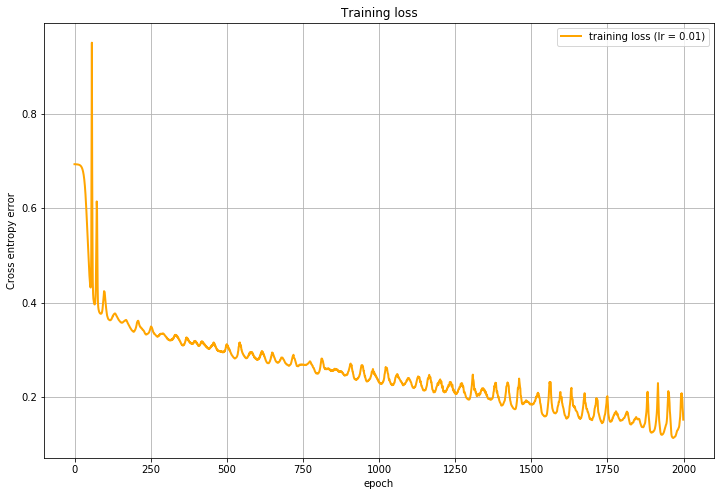

In [108]:
epochs = 2000
lr1 = 0.001*np.ones(epochs)
# =========Write your code below ==============
# neuron = forward_propagation(X_trn, parameters, 'ReLU')
# grads = backprop(parameters, neuron, X_trn, Y_trn, 'ReLU')
# loss = cross_entropy_loss(neuron['A2'], Y_trn)
# parameters = update_parameters(parameters, grads, 0.01)
err_tst, err_trn, loss_trn, parameters = nn_model1(X_trn, X_tst, Y_trn, Y_tst, num_hidden, num_op, epochs, 'ReLU', lr1)


# =============================================
plt.figure(1, figsize=(12, 8))
plt.plot(range(epochs), loss_trn, '-', color='orange',linewidth=2, label='training loss (lr = 0.01)')
plt.title('Training loss')
plt.xlabel('epoch')
plt.ylabel('Cross entropy error')
plt.legend(loc='best')
plt.grid()
plt.show()

# Problem 1: Learning with fixed learning rate.
Using ReLU as your activation function, implement a learning algorithm with fixed learning rate $\eta = 0.01$ at each step. Plot the training and testing error (classification error) you get at each epoch. Justify your plot. (Set the number of hidden neurons in the hidden layer to be 20 for problem 1-3, for all problems below, set epochs = 20000).

epoch:  0
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  20
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  21
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  22
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  23
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  24
(20, 1) (2, 1)


epoch:  219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  242
(20, 1) (2, 1)
(20, 1)

epoch:  465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  484
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  485
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  486
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  488
(20, 1) (2, 1)
(20, 1)

epoch:  673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  696
(20, 1) (2, 1)
(20, 1)

(20, 1) (2, 1)
epoch:  896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  919
(20, 1)

(20, 1) (2, 1)
epoch:  1114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1116
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1117
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1133
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1134
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1135
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1136
(20, 1) (2, 1)
(20, 1) (2,

epoch:  1315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1326
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1327
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1328
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1329
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1330
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1331
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1332
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1333
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1334
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1335
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1336
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1337
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  133

(20, 1) (2, 1)
epoch:  1509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1513
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1514
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1531
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  1742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1764
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  1939
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1940
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1941
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1942
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1943
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1944
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1945
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1961
(20, 1) (2, 1)
(20, 1) (2,

epoch:  2151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2171
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2172
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2173
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  217

(20, 1) (2, 1)
epoch:  2392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2409
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2410
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2411
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2412
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2413
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2414
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  2590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2612
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  2804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2806
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2826
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3023
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3248
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3249
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3250
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3462
(20, 1) (2, 1)
(20, 1) (2,

epoch:  3666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  368

(20, 1) (2, 1)
epoch:  3880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3885
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3886
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3887
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3888
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3902
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4107
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4108
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4109
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4110
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4111
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4112
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4113
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4116
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4117
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  412

(20, 1) (2, 1)
epoch:  4320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4326
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4327
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4328
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4329
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4330
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4331
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4332
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4333
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4334
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4335
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4336
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4337
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4338
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4339
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4340
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4341
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4342
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  4534
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4537
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4540
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4541
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4542
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4544
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4545
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4548
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4549
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4550
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4551
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4552
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4556
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  476

epoch:  4960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4980
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  498

epoch:  5188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  521

epoch:  5417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  544

epoch:  5633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5642
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5649
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5650
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5651
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5652
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5653
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5654
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5655
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  565

epoch:  5857
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5858
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5859
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5860
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5861
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5875
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5877
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  588

epoch:  6084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6085
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6089
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6090
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6091
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6092
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6093
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6094
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6095
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6099
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6100
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6102
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6103
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6104
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  610

epoch:  6317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6326
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6327
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6328
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6329
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6330
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6331
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6332
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6333
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6334
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6335
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6336
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6337
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6338
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6339
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  634

(20, 1) (2, 1)
epoch:  6546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6548
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6549
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6550
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6551
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6552
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6556
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6557
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6558
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6559
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6560
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6561
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6562
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6563
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6564
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6565
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6566
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6567
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6568
(20, 1) (2, 1)
(20, 1) (2,

epoch:  6778
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6779
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6780
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6781
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6782
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6783
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6784
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6785
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6786
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6787
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6788
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  680

epoch:  7002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  702

epoch:  7219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  724

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


epoch:  7333
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7334
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7335
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7336
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7337
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7338
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7339
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7340
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7341
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7342
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7343
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7344
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7345
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7351
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7352
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  735

epoch:  7539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7540
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7541
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7542
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7544
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7545
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7548
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7549
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7550
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7551
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7552
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7556
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7557
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7558
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7559
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7560
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7561
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  756

epoch:  7734
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7735
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7736
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7737
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7738
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7740
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7741
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  775

epoch:  7956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  797

(20, 1) (2, 1)
epoch:  8180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8182
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8183
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8184
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8185
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8186
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8202
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  8383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8405
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  8579
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8601
(20, 1) (2, 1)
(20, 1) (2,

epoch:  8807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  883

(20, 1) (2, 1)
epoch:  9003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9025
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  9209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9231
(20, 1) (2, 1)
(20, 1) (2,

epoch:  9433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  945

(20, 1) (2, 1)
epoch:  9654
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9655
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9656
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9657
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9676
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  9860
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9861
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9875
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9877
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9882
(20, 1) (2, 1)
(20, 1) (2,

epoch:  10066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10085
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10088
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  10296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10318
(20

epoch:  10504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10513
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10514
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10526
(20, 1) (2, 1)
(20

epoch:  10718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10722
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10732
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10733
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10734
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10735
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10736
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10737
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10738
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10740
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  10934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10938
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10939
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10940
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10941
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10942
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10943
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10944
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10945
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10956
(20

epoch:  11160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11171
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11172
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11173
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11174
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11175
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11176
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11177
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11178
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11179
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11182
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  11395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11409
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11410
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11411
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11412
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11413
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11414
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11415
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11416
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11417
(20

(20, 1) (2, 1)
epoch:  11595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11614
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11615
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11617
(20

epoch:  11786
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11787
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11788
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11801
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11806
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11808
(20, 1) (2, 1)
(20

epoch:  11973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11980
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11991
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11992
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11993
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11994
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11995
(20, 1) (2, 1)
(20

epoch:  12196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12218
(20, 1) (2, 1)
(20

epoch:  12416
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12438
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  12620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12621
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12624
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12625
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12626
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12642
(20

(20, 1) (2, 1)
epoch:  12823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12845
(20

(20, 1) (2, 1)
epoch:  13039
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13040
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13041
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13042
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13043
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13044
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13045
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13046
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13047
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13048
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13049
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13050
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13051
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13052
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13053
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13054
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13055
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13056
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13057
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13061
(20

epoch:  13226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13248
(20, 1) (2, 1)
(20

epoch:  13452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13474
(20, 1) (2, 1)
(20

epoch:  13643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13649
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13650
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13651
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13652
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13653
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13654
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13655
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13656
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13657
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13665
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  13855
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13856
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13857
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13858
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13859
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13860
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13861
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13875
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13877
(20

epoch:  14061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14083
(20, 1) (2, 1)
(20

epoch:  14304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14326
(20, 1) (2, 1)
(20

epoch:  14534
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14537
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14540
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14541
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14542
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14544
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14545
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14548
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14549
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14550
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14551
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14552
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14556
(20, 1) (2, 1)
(20

epoch:  14745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14767
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  14975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14980
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14991
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14992
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14993
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14994
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14995
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14996
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14997
(20

epoch:  15172
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15173
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15174
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15175
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15176
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15177
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15178
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15179
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15182
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15183
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15184
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15185
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15186
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15194
(20, 1) (2, 1)
(20

epoch:  15399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15409
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15410
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15411
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15412
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15413
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15414
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15415
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15416
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15421
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  15613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15614
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15615
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15617
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15618
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15621
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15624
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15625
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15626
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15635
(20

(20, 1) (2, 1)
epoch:  15808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15830
(20

epoch:  16000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16022
(20, 1) (2, 1)
(20

epoch:  16192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16214
(20, 1) (2, 1)
(20

epoch:  16382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16404
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  16619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16621
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16624
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16625
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16626
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16641
(20

(20, 1) (2, 1)
epoch:  16827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16849
(20

epoch:  17058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17080
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  17289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17311
(20

(20, 1) (2, 1)
epoch:  17518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17531
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17532
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17533
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17534
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17537
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17540
(20

epoch:  17749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17767
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17768
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17769
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17770
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17771
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  17981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17991
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17992
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17993
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17994
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17995
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17996
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17997
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17998
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17999
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18003
(20

epoch:  18214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18236
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  18445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18467
(20

epoch:  18677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18699
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  18910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18932
(20

(20, 1) (2, 1)
epoch:  19140
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19141
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19142
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19162
(20

epoch:  19372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19394
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  19604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19614
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19615
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19617
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19618
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19621
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19624
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19625
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19626
(20

epoch:  19835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19849
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19851
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19853
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19854
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19855
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19856
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19857
(20, 1) (2, 1)
(20

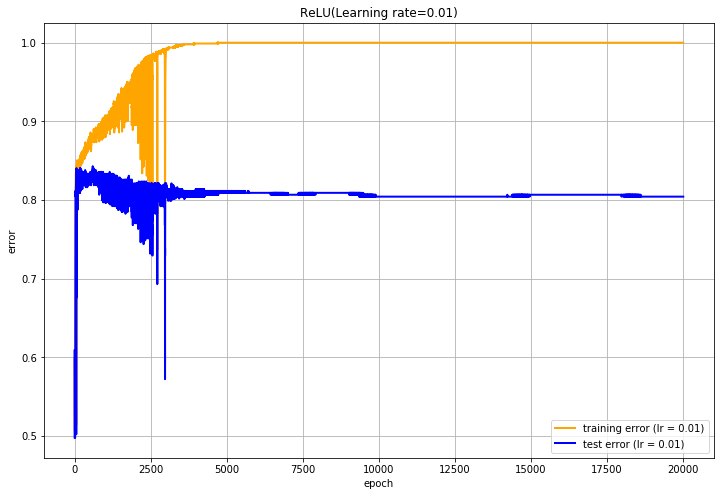

In [123]:
epochs = 20000
lr1 = 0.001*np.ones(epochs)
# =========Write your code below ==============

err_tst, err_trn, loss_trn, parameters = nn_model1(X_trn, X_tst, Y_trn, Y_tst, num_hidden, num_op, epochs, 'ReLU', lr1)


# =============================================
plt.figure(1, figsize=(12, 8))
plt.plot(range(epochs), err_trn, '-', color='orange',linewidth=2, label='training error (lr = 0.01)')
plt.plot(range(epochs), err_tst, '-b', linewidth=2, label='test error (lr = 0.01)')
#plt.plot(range(epochs), trn_loss, '-r', linewidth=2, label='loss (lr = 0.01)')

plt.title('ReLU(Learning rate=0.01)')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()
plt.show()

### Justification:
The test error(accuracy) increase and converge to about 0.82. On the other hand, the training error converge to 1.0. But the test error decrease at epoch = 1750 while training error still increases. It shows that the model is a little overfitting. 

# Problem 2: 
Using ReLU as your activation function, change the learning rate to $\eta = 0.1$. Plot the plots on the same figure as in problem 1. Compare the plots and justify.

epoch:  0
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  20
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  21
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  22
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  23
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  24
(20, 1) (2, 1)


epoch:  232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  248
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  249
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  250
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  251
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  252
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  253
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  254
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  255
(20, 1) (2, 1)
(20, 1)

epoch:  470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  484
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  485
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  486
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  488
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  493
(20, 1) (2, 1)
(20, 1)

(20, 1) (2, 1)
epoch:  710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  722
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  732
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  733
(20, 1)

epoch:  948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  971
(20, 1) (2, 1)
(20, 1)

epoch:  1188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  121

(20, 1) (2, 1)
epoch:  1427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1449
(20, 1) (2, 1)
(20, 1) (2,

epoch:  1665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  168

(20, 1) (2, 1)
epoch:  1907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1929
(20, 1) (2, 1)
(20, 1) (2,

epoch:  2147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  217

epoch:  2388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2409
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2410
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  241

(20, 1) (2, 1)
epoch:  2627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2642
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2649
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  2863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2875
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2877
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2885
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3102
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3103
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3104
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3107
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3108
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3109
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3110
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3111
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3112
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3113
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3116
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3117
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3123
(20, 1) (2, 1)
(20, 1) (2,

epoch:  3342
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3343
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3344
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3345
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3351
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3352
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  336

(20, 1) (2, 1)
epoch:  3581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3603
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3842
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4057
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  408

epoch:  4282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  430

epoch:  4505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4513
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4514
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  452

(20, 1) (2, 1)
epoch:  4745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4767
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4991
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4992
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4993
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4994
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4995
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4996
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4997
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4998
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4999
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  500

epoch:  5224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  524

(20, 1) (2, 1)
epoch:  5462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5484
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  5696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5718
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  5934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5938
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5939
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5940
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5941
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5942
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5943
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5944
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5945
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5956
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  6170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6171
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6172
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6173
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6174
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6175
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6176
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6177
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6178
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6179
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6182
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6183
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6184
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6185
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6186
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6192
(20, 1) (2, 1)
(20, 1) (2,

epoch:  6407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6409
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6410
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6411
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6412
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6413
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6414
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6415
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6416
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  643

epoch:  6643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6649
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6650
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6651
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6652
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6653
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6654
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6655
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6656
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6657
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  666

(20, 1) (2, 1)
epoch:  6881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6885
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6886
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6887
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6888
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6903
(20, 1) (2, 1)
(20, 1) (2,

epoch:  7118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7133
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7134
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7135
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7136
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7137
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7138
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7139
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7140
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  714

epoch:  7355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  737

(20, 1) (2, 1)
epoch:  7592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7614
(20, 1) (2, 1)
(20, 1) (2,

epoch:  7828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7849
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  785

(20, 1) (2, 1)
epoch:  8067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8085
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8089
(20, 1) (2, 1)
(20, 1) (2,

epoch:  8306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8326
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8327
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8328
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  832

epoch:  8543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8544
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8545
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8548
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8549
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8550
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8551
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8552
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8556
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8557
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8558
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8559
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8560
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8561
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8562
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8563
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8564
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8565
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  856

epoch:  8779
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8780
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8781
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8782
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8783
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8784
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8785
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8786
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8787
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8788
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8801
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  880

epoch:  9016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9025
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9026
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9027
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9028
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9029
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9030
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9031
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9032
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9033
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9034
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9035
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9036
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9037
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9038
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  903

(20, 1) (2, 1)
epoch:  9250
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9251
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9252
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9253
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9254
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9255
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9256
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9257
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9258
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9259
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9260
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9261
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9262
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9263
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9264
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9265
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9266
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9267
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9268
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9269
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9270
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9271
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9272
(20, 1) (2, 1)
(20, 1) (2,

epoch:  9489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9499
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9503
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  951

(20, 1) (2, 1)
epoch:  9727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9732
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9733
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9734
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9735
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9736
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9737
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9738
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9740
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9741
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9749
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  9965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9980
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9987
(20, 1) (2, 1)
(20, 1) (2,

epoch:  10202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10224
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  10439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10461
(20

(20, 1) (2, 1)
epoch:  10678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10700
(20

epoch:  10914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10936
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  11149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11171
(20

epoch:  11386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11408
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  11619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11621
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11624
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11625
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11626
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11641
(20

epoch:  11852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11853
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11854
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11855
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11856
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11857
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11858
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11859
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11860
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11861
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11874
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  12090
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12091
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12092
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12093
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12094
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12095
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12099
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12100
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12102
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12103
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12104
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12107
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12108
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12109
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12110
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12111
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12112
(20

epoch:  12327
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12328
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12329
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12330
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12331
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12332
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12333
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12334
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12335
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12336
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12337
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12338
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12339
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12340
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12341
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12342
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12343
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12344
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12345
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12349
(20, 1) (2, 1)
(20

epoch:  12565
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12566
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12567
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12568
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12569
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12570
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12571
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12572
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12573
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12574
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12575
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12576
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12577
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12578
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12579
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12587
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  12802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12806
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12824
(20

(20, 1) (2, 1)
epoch:  13029
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13030
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13031
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13032
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13033
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13034
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13035
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13036
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13037
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13038
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13039
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13040
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13041
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13042
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13043
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13044
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13045
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13046
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13047
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13048
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13049
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13050
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13051
(20

epoch:  13264
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13265
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13266
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13267
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13268
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13269
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13270
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13271
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13272
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13273
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13274
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13275
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13276
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13277
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13278
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13279
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13280
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13281
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13286
(20, 1) (2, 1)
(20

epoch:  13500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13503
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13513
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13514
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13522
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  13739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13740
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13741
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13761
(20

(20, 1) (2, 1)
epoch:  13968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13980
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13990
(20

epoch:  14205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14227
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  14442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14464
(20

(20, 1) (2, 1)
epoch:  14679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14701
(20

epoch:  14912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14934
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  15150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15171
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15172
(20

(20, 1) (2, 1)
epoch:  15388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15409
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15410
(20

(20, 1) (2, 1)
epoch:  15627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15642
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15649
(20

epoch:  15864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15875
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15877
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15885
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15886
(20, 1) (2, 1)
(20

epoch:  16103
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16104
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16107
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16108
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16109
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16110
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16111
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16112
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16113
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16116
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16117
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16125
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  16344
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16345
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16351
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16352
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16366
(20

(20, 1) (2, 1)
epoch:  16578
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16579
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16600
(20

(20, 1) (2, 1)
epoch:  16818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16840
(20

(20, 1) (2, 1)
epoch:  17062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17084
(20

epoch:  17302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17324
(20, 1) (2, 1)
(20

epoch:  17538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17540
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17541
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17542
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17544
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17545
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17548
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17549
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17550
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17551
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17552
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17556
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17557
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17558
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17559
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17560
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  17779
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17780
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17781
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17782
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17783
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17784
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17785
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17786
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17787
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17788
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17801
(20

(20, 1) (2, 1)
epoch:  18019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18025
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18026
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18027
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18028
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18029
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18030
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18031
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18032
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18033
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18034
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18035
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18036
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18037
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18038
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18039
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18040
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18041
(20

(20, 1) (2, 1)
epoch:  18259
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18260
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18261
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18262
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18263
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18264
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18265
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18266
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18267
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18268
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18269
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18270
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18271
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18272
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18273
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18274
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18275
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18276
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18277
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18278
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18279
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18280
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18281
(20

(20, 1) (2, 1)
epoch:  18498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18499
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18503
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18513
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18514
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18520
(20

epoch:  18737
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18738
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18740
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18741
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18759
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  18960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18980
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18982
(20

epoch:  19154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19171
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19172
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19173
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19174
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19175
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19176
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  19390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19409
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19410
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19411
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19412
(20

epoch:  19602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19614
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19615
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19617
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19618
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19621
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19624
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  19832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19849
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19851
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19853
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19854
(20

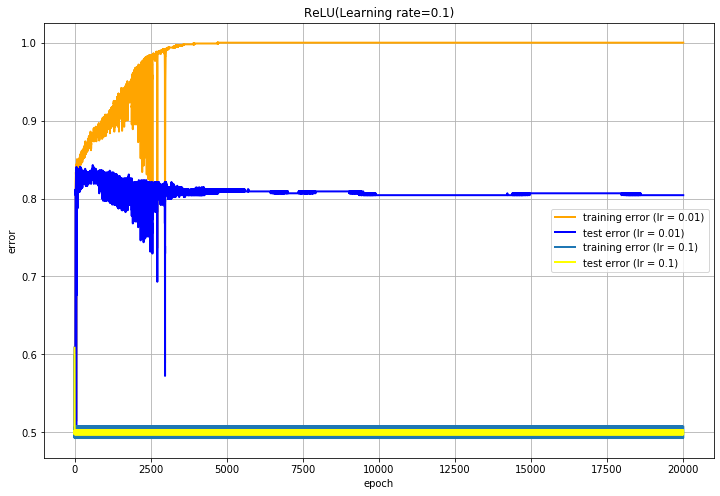

In [124]:
lr2 = 0.01*np.ones(epochs)
# =========Write your code below ==============

err_tst2, err_trn2, loss_trn, parameters = nn_model1(X_trn, X_tst, Y_trn, Y_tst, num_hidden, num_op, epochs, 'ReLU', lr2)



# =============================================
plt.figure(2, figsize=(12, 8))
# Classification errors for learning rate = 0.01, Relu Activation, n_hidden = 20
plt.plot(range(epochs), err_trn, '-', color='orange',linewidth=2, label='training error (lr = 0.01)')
plt.plot(range(epochs), err_tst, '-b', linewidth=2, label='test error (lr = 0.01)')

# Classification errors for learning rate = 0.1, Relu Activation, n_hidden = 20
plt.plot(range(epochs), err_trn2, '-', linewidth=2, label='training error (lr = 0.1)')
plt.plot(range(epochs), err_tst2, '-b', color='yellow', linewidth=2,  label='test error (lr = 0.1)')

plt.title('ReLU(Learning rate=0.1)')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()
plt.show()

### Justification
In this experiment, the learning rate is 10 times larger than the 1st experiment. We can see that the training result is bad. It is oscillating at 0.5. The reason could be that the learning rate is so large that it can not converge to the minimum of the gradient. 

# Problem 3: Learning with variable learning rate.
Using ReLU as your activation function, implement a learning algorithm with variable learning rate $\eta = \frac1{\sqrt{i+1}}$ at the $i$th step. Plot the training and testing error you get at each iteration and compare it with the plots you get previously. Justify your plot.

epoch:  0
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  20
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  21
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  22
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  23
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  24
(20, 1) (2, 1)


epoch:  225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  248
(20, 1) (2, 1)
(20, 1)

(20, 1) (2, 1)
epoch:  454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  477
(20, 1)

(20, 1) (2, 1)
epoch:  686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  709
(20, 1)

(20, 1) (2, 1)
epoch:  916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  938
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  939
(20, 1)

(20, 1) (2, 1)
epoch:  1149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1171
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  1381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1403
(20, 1) (2, 1)
(20, 1) (2,

epoch:  1588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  161

(20, 1) (2, 1)
epoch:  1803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1806
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1825
(20, 1) (2, 1)
(20, 1) (2,

epoch:  1997
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1998
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1999
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  202

(20, 1) (2, 1)
epoch:  2193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2215
(20, 1) (2, 1)
(20, 1) (2,

epoch:  2386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  240

(20, 1) (2, 1)
epoch:  2584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2606
(20, 1) (2, 1)
(20, 1) (2,

epoch:  2802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2806
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  282

(20, 1) (2, 1)
epoch:  3008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3025
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3026
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3027
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3028
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3029
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3030
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3234
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3445
(20, 1) (2, 1)
(20, 1) (2,

epoch:  3630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3642
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3649
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3650
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3651
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3652
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  365

epoch:  3876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3877
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3885
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3886
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3887
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3888
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  389

(20, 1) (2, 1)
epoch:  4096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4099
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4100
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4102
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4103
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4104
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4107
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4108
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4109
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4110
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4111
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4112
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4113
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4116
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4117
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4118
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  431

(20, 1) (2, 1)
epoch:  4481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4484
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4485
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4486
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4488
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4499
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4503
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  4715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4722
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4732
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4733
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4734
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4735
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4736
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4737
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  497

epoch:  5178
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5179
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5182
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5183
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5184
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5185
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5186
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  520

epoch:  5411
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5412
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5413
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5414
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5415
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5416
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  543

(20, 1) (2, 1)
epoch:  5645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5649
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5650
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5651
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5652
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5653
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5654
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5655
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5656
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5657
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5667
(20, 1) (2, 1)
(20, 1) (2,

epoch:  5878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5885
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5886
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5887
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5888
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  590

(20, 1) (2, 1)
epoch:  6111
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6112
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6113
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6116
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6117
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6133
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  6347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6351
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6352
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6369
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  6581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6603
(20, 1) (2, 1)
(20, 1) (2,

epoch:  6813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  683

(20, 1) (2, 1)
epoch:  7052
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7053
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7054
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7055
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7056
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7057
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7074
(20, 1) (2, 1)
(20, 1) (2,

epoch:  7273
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7274
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7275
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7276
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7277
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7278
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7279
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7280
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7281
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  729

(20, 1) (2, 1)
epoch:  7477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7484
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7485
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7486
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7488
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7499
(20, 1) (2, 1)
(20, 1) (2,

epoch:  7688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  771

(20, 1) (2, 1)
epoch:  7928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7938
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7939
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7940
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7941
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7942
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7943
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7944
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7945
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7950
(20, 1) (2, 1)
(20, 1) (2,

epoch:  8165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8171
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8172
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8173
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8174
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8175
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8176
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8177
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8178
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8179
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8182
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8183
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8184
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8185
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8186
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  818

epoch:  8374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  839

epoch:  8587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  861

(20, 1) (2, 1)
epoch:  8831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8849
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8851
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8853
(20, 1) (2, 1)
(20, 1) (2,

epoch:  9054
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9055
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9056
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9057
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  907

epoch:  9274
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9275
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9276
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9277
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9278
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9279
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9280
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9281
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  929

epoch:  9487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9488
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9499
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9503
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  951

epoch:  9709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9722
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  973

(20, 1) (2, 1)
epoch:  9917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9938
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9939
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  10125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10133
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10134
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10135
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10136
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10137
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10138
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10139
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10140
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10141
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10142
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10147
(20

(20, 1) (2, 1)
epoch:  10361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10383
(20

epoch:  10581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10603
(20, 1) (2, 1)
(20

epoch:  10782
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10783
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10784
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10785
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10786
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10787
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10788
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10801
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10804
(20, 1) (2, 1)
(20

epoch:  11006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11025
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11026
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11027
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11028
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  11213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11235
(20

epoch:  11417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11439
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  11628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11642
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11649
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11650
(20

(20, 1) (2, 1)
epoch:  11853
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11854
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11855
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11856
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11857
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11858
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11859
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11860
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11861
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11875
(20

(20, 1) (2, 1)
epoch:  12071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12085
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12089
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12090
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12091
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12092
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12093
(20

(20, 1) (2, 1)
epoch:  12307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12326
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12327
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12328
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12329
(20

epoch:  12509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12513
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12514
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12531
(20, 1) (2, 1)
(20

epoch:  12699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12721
(20, 1) (2, 1)
(20

epoch:  12894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12916
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  13081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13085
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13089
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13090
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13091
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13092
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13093
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13094
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13095
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13099
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13100
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13102
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13103
(20

(20, 1) (2, 1)
epoch:  13283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13305
(20

(20, 1) (2, 1)
epoch:  13491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13499
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13503
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13513
(20

(20, 1) (2, 1)
epoch:  13700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13722
(20

epoch:  13899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13921
(20, 1) (2, 1)
(20

epoch:  14114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14116
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14117
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14133
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14134
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14135
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14136
(20, 1) (2, 1)
(20

epoch:  14339
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14340
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14341
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14342
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14343
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14344
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14345
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14351
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14352
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14361
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  14564
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14565
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14566
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14567
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14568
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14569
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14570
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14571
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14572
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14573
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14574
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14575
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14576
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14577
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14578
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14579
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14586
(20

(20, 1) (2, 1)
epoch:  14794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14801
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14806
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14816
(20

epoch:  15028
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15029
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15030
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15031
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15032
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15033
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15034
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15035
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15036
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15037
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15038
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15039
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15040
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15041
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15042
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15043
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15044
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15045
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15046
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15047
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15048
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15049
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15050
(20, 1) (2, 1)
(20

epoch:  15261
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15262
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15263
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15264
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15265
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15266
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15267
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15268
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15269
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15270
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15271
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15272
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15273
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15274
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15275
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15276
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15277
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15278
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15279
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15280
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15281
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15283
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  15491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15499
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15503
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15513
(20

epoch:  15725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15732
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15733
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15734
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15735
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15736
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15737
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15738
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15740
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15741
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15747
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  15955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15977
(20

epoch:  16187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16209
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  16420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16442
(20

epoch:  16622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16624
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16625
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16626
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16642
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16644
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  16822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16844
(20

(20, 1) (2, 1)
epoch:  17014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17025
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17026
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17027
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17028
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17029
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17030
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17031
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17032
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17033
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17034
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17035
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17036
(20

(20, 1) (2, 1)
epoch:  17226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17248
(20

(20, 1) (2, 1)
epoch:  17461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17483
(20

(20, 1) (2, 1)
epoch:  17694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17716
(20

(20, 1) (2, 1)
epoch:  17926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17938
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17939
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17940
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17941
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17942
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17943
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17944
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17945
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17948
(20

epoch:  18158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18171
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18172
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18173
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18174
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18175
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18176
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18177
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18178
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18179
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18180
(20, 1) (2, 1)
(20

epoch:  18393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18405
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18406
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18407
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18408
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18409
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18410
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18411
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18412
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18413
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18414
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18415
(20, 1) (2, 1)
(20

epoch:  18627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18642
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18649
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  18862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18875
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18877
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18884
(20

epoch:  19094
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19095
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19099
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19100
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19102
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19103
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19104
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19107
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19108
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19109
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19110
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19111
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19112
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19113
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19116
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  19329
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19330
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19331
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19332
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19333
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19334
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19335
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19336
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19337
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19338
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19339
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19340
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19341
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19342
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19343
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19344
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19345
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19351
(20

(20, 1) (2, 1)
epoch:  19560
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19561
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19562
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19563
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19564
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19565
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19566
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19567
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19568
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19569
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19570
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19571
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19572
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19573
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19574
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19575
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19576
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19577
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19578
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19579
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19582
(20

(20, 1) (2, 1)
epoch:  19793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19801
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19806
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19815
(20

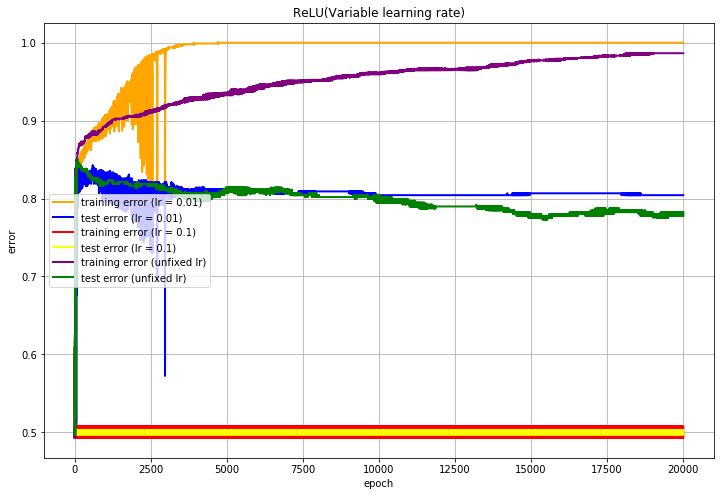

In [125]:
indices = np.array(range(epochs))
lr3 = 0.01/np.sqrt(indices + 1)
# =========Write your code below ==============
err_tst3, err_trn3, loss_trn, parameters = nn_model1(X_trn, X_tst, Y_trn, Y_tst, num_hidden, num_op, epochs, 'ReLU', lr3)


# =============================================
plt.figure(3, figsize=(12, 8))
# Classification errors for learning rate = 0.01, Relu Activation, n_hidden = 20
plt.plot(range(epochs), err_trn, '-', color='orange',linewidth=2, label='training error (lr = 0.01)')
plt.plot(range(epochs), err_tst, '-b', linewidth=2, label='test error (lr = 0.01)')

# Classification errors for learning rate = 0.1, Relu Activation, n_hidden = 20
plt.plot(range(epochs), err_trn2, '-', color='red', linewidth=2, label='training error (lr = 0.1)')
plt.plot(range(epochs), err_tst2, '-b', color='yellow', linewidth=2, label='test error (lr = 0.1)')

# Classification errors for variable learning rate, Relu Activation, n_hidden = 20
plt.plot(range(epochs), err_trn3, '-', color='purple', linewidth=2, label='training error (unfixed lr)')
plt.plot(range(epochs), err_tst3, '-b', color='green', linewidth=2, label='test error (unfixed lr)')
plt.title('ReLU(Variable learning rate)')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()
plt.show()

### Justification
In this experiment, when we run more and more epochs, the learning rate would be smaller and smaller. The training accuracy converges to 1.0 slowlier than the 1st model did. This reason could be that it changes too little after 10000th epochs. The 1st model still has learning rate of 0.001 but it has only 0.0001. So it adjusts the weights slower than 1st model did. Moreover, its test accuracy is decreasing and still not converge, so it also has a little bit overfitting. 

# Problem 4: Larger hidden layer.
Change the number of neurons in the hidden layer to be $50$. Redo the experiment in problem 1. Plot all four plots in the same figure and justify your plot.

epoch:  0
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  20
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  21
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  22
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  23
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  24
(20, 1) (2, 1)


(20, 1) (2, 1)
epoch:  232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  248
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  249
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  250
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  251
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  252
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  253
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  254
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  255
(20, 1)

(20, 1) (2, 1)
epoch:  468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  484
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  485
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  486
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  488
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  491
(20, 1)

epoch:  704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  722
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  727
(20, 1) (2, 1)
(20, 1)

epoch:  939
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  940
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  941
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  942
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  943
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  944
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  945
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  962
(20, 1) (2, 1)
(20, 1)

(20, 1) (2, 1)
epoch:  1175
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1176
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1177
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1178
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1179
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1182
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1183
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1184
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1185
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1186
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1197
(20, 1) (2, 1)
(20, 1) (2,

epoch:  1412
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1413
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1414
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1415
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1416
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  143

epoch:  1650
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1651
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1652
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1653
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1654
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1655
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1656
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1657
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  167

(20, 1) (2, 1)
epoch:  1873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1875
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1877
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1885
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1886
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1887
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1888
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1895
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  2110
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2111
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2112
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2113
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2114
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2115
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2116
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2117
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2132
(20, 1) (2, 1)
(20, 1) (2,

epoch:  2344
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2345
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2351
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2352
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  236

(20, 1) (2, 1)
epoch:  2580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2602
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  2820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2842
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3055
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3056
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3057
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3077
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3308
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3531
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3532
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3533
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3534
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3537
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3540
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3541
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3542
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3544
(20, 1) (2,

epoch:  3758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3767
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3768
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3769
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3770
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3771
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3772
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3773
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3774
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3775
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3776
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3777
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3778
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3779
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3780
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  378

epoch:  3995
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3996
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3997
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3998
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3999
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  401

epoch:  4232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4248
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4249
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4250
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4251
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4252
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4253
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4254
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  425

(20, 1) (2, 1)
epoch:  4469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4484
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4485
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4486
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4488
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4491
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4722
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  472

(20, 1) (2, 1)
epoch:  4943
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4944
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4945
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4965
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  5180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5182
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5183
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5184
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5185
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5186
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5202
(20, 1) (2, 1)
(20, 1) (2,

epoch:  5416
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  543

(20, 1) (2, 1)
epoch:  5653
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5654
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5655
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5656
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5657
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5675
(20, 1) (2, 1)
(20, 1) (2,

epoch:  5889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  591

epoch:  6123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6133
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6134
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6135
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6136
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6137
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6138
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6139
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6140
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6141
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6142
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  614

(20, 1) (2, 1)
epoch:  6358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6380
(20, 1) (2, 1)
(20, 1) (2,

epoch:  6594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6614
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6615
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  661

epoch:  6830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6849
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6851
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  685

epoch:  7067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7085
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7089
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  709

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


(20, 1) (2, 1)
epoch:  7305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7326
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7327
(20, 1) (2, 1)
(20, 1) (2,

epoch:  7538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7540
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7541
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7542
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7544
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7545
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7548
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7549
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7550
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7551
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7552
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7556
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7557
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7558
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7559
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7560
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  756

(20, 1) (2, 1)
epoch:  7772
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7773
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7774
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7775
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7776
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7777
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7778
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7779
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7780
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7781
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7782
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7783
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7784
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7785
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7786
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7787
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7788
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7794
(20, 1) (2, 1)
(20, 1) (2,

epoch:  8005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8007
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8008
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8009
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8010
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8011
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8012
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8013
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8014
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8015
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8016
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8017
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8018
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8025
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8026
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8027
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  802

epoch:  8240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8248
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8249
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8250
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8251
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8252
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8253
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8254
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8255
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8256
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8257
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8258
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8259
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8260
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8261
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8262
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  826

epoch:  8475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8484
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8485
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8486
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8488
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  849

epoch:  8712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8722
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8732
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8733
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8734
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  873

(20, 1) (2, 1)
epoch:  8946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8968
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  9178
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9179
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9180
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9181
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9182
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9183
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9184
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9185
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9186
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9187
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9188
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9189
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9200
(20, 1) (2, 1)
(20, 1) (2,

epoch:  9412
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9413
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9414
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9415
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9416
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9417
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9418
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9419
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9420
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9421
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  943

epoch:  9647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9649
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9650
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9651
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9652
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9653
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9654
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9655
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9656
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9657
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  967

epoch:  9882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9885
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9886
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9887
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9888
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  990

(20, 1) (2, 1)
epoch:  10118
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10119
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10120
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10121
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10122
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10123
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10124
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10125
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10126
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10133
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10134
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10135
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10136
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10137
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10138
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10139
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10140
(20

(20, 1) (2, 1)
epoch:  10353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10375
(20

(20, 1) (2, 1)
epoch:  10575
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10576
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10577
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10578
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10579
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10597
(20

(20, 1) (2, 1)
epoch:  10809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10831
(20

epoch:  11047
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11048
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11049
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11050
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11051
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11052
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11053
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11054
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11055
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11056
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11057
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11069
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  11282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11304
(20

(20, 1) (2, 1)
epoch:  11518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11531
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11532
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11533
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11534
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11537
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11540
(20

epoch:  11752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11767
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11768
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11769
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11770
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11771
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11772
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11773
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11774
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  11983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11991
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11992
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11993
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11994
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11995
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11996
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11997
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11998
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11999
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12005
(20

(20, 1) (2, 1)
epoch:  12217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12239
(20

epoch:  12445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12467
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  12682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12704
(20

epoch:  12915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12937
(20, 1) (2, 1)
(20

epoch:  13149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13171
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  13383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13399
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13400
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13401
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13402
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13403
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13404
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13405
(20

epoch:  13616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13617
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13618
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13621
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13624
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13625
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13626
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13638
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  13852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13853
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13854
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13855
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13856
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13857
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13858
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13859
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13860
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13861
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13874
(20

(20, 1) (2, 1)
epoch:  14087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14089
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14090
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14091
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14092
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14093
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14094
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14095
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14099
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14100
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14102
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14103
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14104
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14107
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14108
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14109
(20

(20, 1) (2, 1)
epoch:  14318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14326
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14327
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14328
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14329
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14330
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14331
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14332
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14333
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14334
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14335
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14336
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14337
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14338
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14339
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14340
(20

(20, 1) (2, 1)
epoch:  14553
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14554
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14556
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14557
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14558
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14559
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14560
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14561
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14562
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14563
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14564
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14565
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14566
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14567
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14568
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14569
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14570
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14571
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14572
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14573
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14574
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14575
(20

epoch:  14784
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14785
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14786
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14787
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14788
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14801
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14806
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  15019
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15020
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15021
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15022
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15023
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15024
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15025
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15026
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15027
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15028
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15029
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15030
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15031
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15032
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15033
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15034
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15035
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15036
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15037
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15038
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15039
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15040
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15041
(20

epoch:  15254
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15255
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15256
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15257
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15258
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15259
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15260
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15261
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15262
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15263
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15264
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15265
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15266
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15267
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15268
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15269
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15270
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15271
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15272
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15273
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15274
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15275
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15276
(20, 1) (2, 1)
(20

epoch:  15489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15499
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15503
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15511
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  15723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15732
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15733
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15734
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15735
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15736
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15737
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15738
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15740
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15741
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15745
(20

epoch:  15958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15959
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15960
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15961
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15962
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15963
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15964
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15965
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15966
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15967
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15980
(20, 1) (2, 1)
(20

epoch:  16194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16216
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  16431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16453
(20

epoch:  16665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16687
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  16903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16925
(20

epoch:  17139
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17140
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17141
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17142
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17161
(20, 1) (2, 1)
(20

epoch:  17377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17395
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17396
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17397
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17398
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17399
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  17612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17614
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17615
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17617
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17618
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17621
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17622
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17623
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17624
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17625
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17626
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17627
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17628
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17634
(20

(20, 1) (2, 1)
epoch:  17844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17849
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17851
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17853
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17854
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17855
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17856
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17857
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17858
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17859
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17860
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17861
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17866
(20

(20, 1) (2, 1)
epoch:  18077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18085
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18089
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18090
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18091
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18092
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18093
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18094
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18095
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18099
(20

epoch:  18312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18321
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18322
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18323
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18324
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18325
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18326
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18327
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18328
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18329
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18330
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18331
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18332
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18333
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18334
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  18506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18513
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18514
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18528
(20

epoch:  18736
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18737
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18738
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18740
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18741
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18758
(20, 1) (2, 1)
(20

epoch:  18969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18980
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18991
(20, 1) (2, 1)
(20

epoch:  19190
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19191
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19192
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19193
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19194
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19195
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19196
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19197
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19198
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19199
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19212
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  19422
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19423
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19424
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19425
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19426
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19427
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19428
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19429
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19430
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19444
(20

epoch:  19657
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19679
(20, 1) (2, 1)
(20

epoch:  19892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19914
(20, 1) (2, 1)
(20

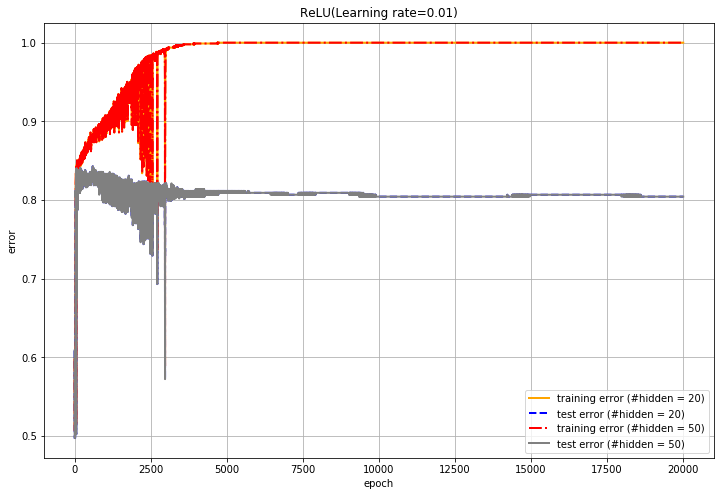

In [112]:
num_hidden2 = 50
# =========Write your code below ==============

err_tst4, err_trn4, loss_trn, parameters = nn_model1(X_trn, X_tst, Y_trn, Y_tst, num_hidden, num_op, epochs, 'ReLU', lr1)


# =============================================
plt.figure(4, figsize=(12, 8))
# Classification errors for learning rate = 0.01, Relu Activation, n_hidden = 20
plt.plot(range(epochs), err_trn, '-', color='orange',linewidth=2, label='training error (#hidden = 20)')
plt.plot(range(epochs), err_tst, '--', color='blue', linewidth=2, label='test error (#hidden = 20)')

# Classification errors for learning rate = 0.01, Relu Activation, n_hidden = 50
plt.plot(range(epochs), err_trn4, '-.', color='red', linewidth=2, label='training error (#hidden = 50)')
plt.plot(range(epochs), err_tst4, '-', color='grey', linewidth=2, label='test error (#hidden = 50)')

plt.title('ReLU(Learning rate=0.01)')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()
plt.show()

### Justification
Here I change the symbo of the line, because they overlapped. In this experiment, with both learning rate to be 0.001, the results seems to be very close(almost the same). However, we should expect that with more hidden layer, the training should be faster and maybe easier to be overfitting. Since it has more weights and neuron. 

# Problem 5: Sigmoid Activation.
Change the activation function to be Sigmoid function. Redo the experiment in problem 1. Plot all four plots in the same figure and justify your plot.

epoch:  0
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  20
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  21
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  22
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  23
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  24
(20, 1) (2, 1)


(20, 1) (2, 1)
epoch:  230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  239
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  240
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  241
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  242
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  243
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  244
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  245
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  246
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  247
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  248
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  249
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  250
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  251
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  252
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  253
(20, 1)

(20, 1) (2, 1)
epoch:  455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  478
(20, 1)

(20, 1) (2, 1)
epoch:  683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  706
(20, 1)

epoch:  911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  934
(20, 1) (2, 1)
(20, 1)

(20, 1) (2, 1)
epoch:  1140
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1141
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1142
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1162
(20, 1) (2, 1)
(20, 1) (2,

epoch:  1368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  139

(20, 1) (2, 1)
epoch:  1599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1614
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1615
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1617
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1618
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1621
(20, 1) (2, 1)
(20, 1) (2,

epoch:  1829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1849
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  1851
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  185

epoch:  2062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  208

epoch:  2293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  231

epoch:  2525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2531
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2532
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2533
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2534
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2537
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2538
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2539
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2540
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2541
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2542
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2543
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2544
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2545
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2546
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2547
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  254

(20, 1) (2, 1)
epoch:  2754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2767
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2768
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2769
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2770
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2771
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2772
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2773
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2774
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2775
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2776
(20, 1) (2, 1)
(20, 1) (2,

epoch:  2984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2991
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2992
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2993
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2994
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2995
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2996
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2997
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2998
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  2999
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  300

(20, 1) (2, 1)
epoch:  3213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3235
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3468
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3698
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  3909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  3931
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4141
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4142
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  416

(20, 1) (2, 1)
epoch:  4363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4385
(20, 1) (2, 1)
(20, 1) (2,

epoch:  4555
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4556
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4557
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4558
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4559
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4560
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4561
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4562
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4563
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4564
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4565
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4566
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4567
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4568
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4569
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4570
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4571
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4572
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4573
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4574
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4575
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4576
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4577
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  457

epoch:  4780
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4781
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4782
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4783
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4784
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4785
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4786
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4787
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4788
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4801
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  480

epoch:  4984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4991
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4992
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4993
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4994
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4995
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4996
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4997
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4998
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  4999
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5003
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5004
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5005
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5006
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  500

epoch:  5216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5236
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5237
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5238
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  523

epoch:  5450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  547

(20, 1) (2, 1)
epoch:  5684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5706
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  5916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  5938
(20, 1) (2, 1)
(20, 1) (2,

epoch:  6145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  616

epoch:  6366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  638

(20, 1) (2, 1)
epoch:  6599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6613
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6614
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6615
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6616
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6617
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6618
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6619
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6620
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6621
(20, 1) (2, 1)
(20, 1) (2,

epoch:  6832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6844
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6845
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6846
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6847
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6848
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6849
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6851
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6853
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  6854
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  685

(20, 1) (2, 1)
epoch:  7063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7085
(20, 1) (2, 1)
(20, 1) (2,

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


(20, 1) (2, 1)
epoch:  7297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7319
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  7515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7531
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7532
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7533
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7534
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7537
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  7745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7746
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7747
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7767
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  7968
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7969
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7970
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7971
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7972
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7973
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7974
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7975
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7976
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7977
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7978
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7979
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7980
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  7990
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  8200
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8201
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8202
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8203
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8204
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8205
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8206
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8207
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8208
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8209
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8210
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8211
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8212
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8213
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8222
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  8432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8453
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8454
(20, 1) (2, 1)
(20, 1) (2,

(20, 1) (2, 1)
epoch:  8629
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8630
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8631
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8632
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8633
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8634
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8635
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8636
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8637
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8638
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8639
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8640
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8641
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8642
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8643
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8644
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8645
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8646
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8647
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8648
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8649
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8650
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8651
(20, 1) (2, 1)
(20, 1) (2,

epoch:  8850
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8851
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8852
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8853
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8854
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8855
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8856
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8857
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8858
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8859
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8860
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8861
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8862
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8863
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8864
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8865
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8866
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8867
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8868
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8869
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8870
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  8872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  887

epoch:  9062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9073
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9074
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9075
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9076
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9077
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9078
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9079
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  908

epoch:  9273
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9274
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9275
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9276
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9277
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9278
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9279
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9280
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9281
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  929

epoch:  9465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9479
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9480
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9481
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9482
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9483
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9484
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9485
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9486
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  948

(20, 1) (2, 1)
epoch:  9685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9699
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9700
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9701
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9702
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9703
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9704
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9707
(20, 1) (2, 1)
(20, 1) (2,

epoch:  9899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  9921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  992

epoch:  10143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10151
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10165
(20, 1) (2, 1)
(20

epoch:  10367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10389
(20, 1) (2, 1)
(20

epoch:  10591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10608
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10609
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10610
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10611
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10612
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10613
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  10822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10830
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10831
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10832
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10833
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10834
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10835
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10836
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10837
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10838
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10839
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10840
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10841
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10842
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10843
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  10844
(20

(20, 1) (2, 1)
epoch:  11051
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11052
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11053
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11054
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11055
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11056
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11057
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11062
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11063
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11064
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11065
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11066
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11067
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11068
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11069
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11070
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11071
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11072
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11073
(20

(20, 1) (2, 1)
epoch:  11281
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11303
(20

epoch:  11515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11531
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11532
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11533
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11534
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11535
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11536
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11537
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  11748
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11749
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11750
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11751
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11752
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11753
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11754
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11755
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11756
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11757
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11758
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11759
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11760
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11761
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11762
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11763
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11764
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11765
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11766
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11767
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11768
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11769
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11770
(20

(20, 1) (2, 1)
epoch:  11981
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11982
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11983
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11984
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11985
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11986
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11987
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11988
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11989
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11990
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11991
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11992
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11993
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11994
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11995
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11996
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11997
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11998
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  11999
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12000
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12001
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12002
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12003
(20

(20, 1) (2, 1)
epoch:  12214
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12215
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12216
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12217
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12218
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12219
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12220
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12221
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12222
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12223
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12224
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12225
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12226
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12227
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12228
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12229
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12230
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12231
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12232
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12233
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12234
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12235
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12236
(20

(20, 1) (2, 1)
epoch:  12431
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12432
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12433
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12434
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12435
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12436
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12437
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12438
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12439
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12440
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12441
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12442
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12443
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12444
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12445
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12446
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12447
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12448
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12449
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12450
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12451
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12452
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12453
(20

epoch:  12659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12681
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  12889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12893
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12894
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12895
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12896
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12897
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12898
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12899
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12900
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12901
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12902
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  12911
(20

(20, 1) (2, 1)
epoch:  13086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13089
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13090
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13091
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13092
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13093
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13094
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13095
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13099
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13100
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13102
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13103
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13104
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13105
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13106
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13107
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13108
(20

(20, 1) (2, 1)
epoch:  13299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13303
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13304
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13305
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13306
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13307
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13308
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13309
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13310
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13311
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13312
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13313
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13314
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13315
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13316
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13317
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13318
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13319
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13320
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13321
(20

epoch:  13509
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13510
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13511
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13512
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13513
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13514
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13515
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13516
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13517
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13518
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13519
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13520
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13521
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13522
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13523
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13524
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13525
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13526
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13527
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13528
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13529
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13530
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13531
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  13724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13727
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13728
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13729
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13730
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13731
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13732
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13733
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13734
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13735
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13736
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13737
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13738
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13739
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13740
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13741
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13742
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13743
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13744
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13745
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13746
(20

epoch:  13937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13938
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13939
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13940
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13941
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13942
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13943
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13944
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13945
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13946
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13947
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13948
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13949
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13950
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13951
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13952
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13953
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13954
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13955
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13956
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13957
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13958
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  13959
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  14152
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14153
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14154
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14155
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14156
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14157
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14158
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14159
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14160
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14161
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14162
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14163
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14164
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14165
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14166
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14167
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14168
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14169
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14170
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14171
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14172
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14173
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14174
(20

(20, 1) (2, 1)
epoch:  14373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14379
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14380
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14381
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14382
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14383
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14384
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14385
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14386
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14387
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14388
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14389
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14390
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14391
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14392
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14393
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14394
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14395
(20

epoch:  14586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14600
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14601
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14602
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14603
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14604
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14605
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14606
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14607
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14608
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  14808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  14830
(20

epoch:  15025
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15026
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15027
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15028
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15029
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15030
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15031
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15032
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15033
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15034
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15035
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15036
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15037
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15038
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15039
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15040
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15041
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15042
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15043
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15044
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15045
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15046
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15047
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  15248
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15249
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15250
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15251
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15252
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15253
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15254
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15255
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15256
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15257
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15258
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15259
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15260
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15261
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15262
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15263
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15264
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15265
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15266
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15267
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15268
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15269
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15270
(20

(20, 1) (2, 1)
epoch:  15457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15476
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15477
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15478
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15479
(20

(20, 1) (2, 1)
epoch:  15677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15680
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15681
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15682
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15683
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15684
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15685
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15686
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15687
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15688
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15689
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15690
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15691
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15692
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15693
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15694
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15695
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15696
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15697
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15698
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15699
(20

epoch:  15903
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15904
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15905
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15906
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15907
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15908
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15909
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15910
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15911
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15912
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15913
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15914
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15915
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  15925
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  16129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16133
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16134
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16135
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16136
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16137
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16138
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16139
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16140
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16141
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16142
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16149
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16150
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16151
(20

epoch:  16357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16368
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16369
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16370
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16371
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16372
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16373
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16374
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16375
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16376
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16377
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16378
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16379
(20, 1) (2, 1)
(20

epoch:  16578
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16579
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16581
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16582
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16583
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16584
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16585
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16586
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16587
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16588
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16589
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16590
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16591
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16592
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16593
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16594
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16595
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16596
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16597
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16598
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16599
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16600
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  16808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16811
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16812
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16813
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16814
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16815
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16816
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16817
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16818
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16819
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16820
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16821
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16822
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16823
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16824
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16825
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16826
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16827
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16828
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16829
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  16830
(20

(20, 1) (2, 1)
epoch:  17040
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17041
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17042
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17043
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17044
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17045
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17046
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17047
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17048
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17049
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17050
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17051
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17052
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17053
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17054
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17055
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17056
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17057
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17058
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17059
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17060
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17061
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17062
(20

epoch:  17267
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17268
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17269
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17270
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17271
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17272
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17273
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17274
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17275
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17276
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17277
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17278
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17279
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17280
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17281
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17289
(20, 1) (2, 1)
(20

(20, 1) (2, 1)
epoch:  17454
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17455
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17456
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17457
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17458
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17459
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17460
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17461
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17462
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17463
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17464
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17465
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17466
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17467
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17468
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17469
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17470
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17471
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17472
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17473
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17474
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17475
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17476
(20

(20, 1) (2, 1)
epoch:  17658
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17659
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17660
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17661
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17662
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17663
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17664
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17665
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17666
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17667
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17668
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17669
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17670
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17671
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17672
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17673
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17674
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17675
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17676
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17677
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17678
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17679
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17680
(20

(20, 1) (2, 1)
epoch:  17871
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17872
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17873
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17874
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17875
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17876
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17877
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17878
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17879
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17880
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17881
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17882
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17883
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17884
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17885
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17886
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17887
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17888
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17889
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17890
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17891
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17892
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  17893
(20

(20, 1) (2, 1)
epoch:  18080
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18081
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18082
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18083
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18084
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18085
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18086
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18087
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18088
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18089
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18090
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18091
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18092
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18093
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18094
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18095
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18096
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18097
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18098
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18099
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18100
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18101
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18102
(20

(20, 1) (2, 1)
epoch:  18281
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18282
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18283
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18284
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18285
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18286
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18287
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18288
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18289
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18290
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18291
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18292
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18293
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18294
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18295
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18296
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18297
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18298
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18299
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18300
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18301
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18302
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18303
(20

(20, 1) (2, 1)
epoch:  18487
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18488
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18489
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18490
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18491
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18492
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18493
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18494
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18495
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18496
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18497
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18498
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18499
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18500
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18501
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18502
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18503
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18504
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18505
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18506
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18507
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18508
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18509
(20

(20, 1) (2, 1)
epoch:  18705
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18706
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18707
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18708
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18709
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18710
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18711
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18712
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18713
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18714
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18715
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18716
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18717
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18718
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18719
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18720
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18721
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18722
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18723
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18724
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18725
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18726
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18727
(20

(20, 1) (2, 1)
epoch:  18916
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18917
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18918
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18919
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18920
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18921
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18922
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18923
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18924
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18925
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18926
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18927
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18928
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18929
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18930
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18931
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18932
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18933
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18934
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18935
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18936
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18937
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  18938
(20

(20, 1) (2, 1)
epoch:  19127
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19128
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19129
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19130
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19131
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19132
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19133
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19134
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19135
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19136
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19137
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19138
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19139
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19140
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19141
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19142
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19143
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19144
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19145
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19146
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19147
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19148
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19149
(20

(20, 1) (2, 1)
epoch:  19346
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19347
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19348
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19349
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19350
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19351
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19352
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19353
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19354
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19355
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19356
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19357
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19358
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19359
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19360
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19361
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19362
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19363
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19364
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19365
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19366
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19367
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19368
(20

(20, 1) (2, 1)
epoch:  19559
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19560
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19561
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19562
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19563
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19564
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19565
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19566
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19567
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19568
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19569
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19570
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19571
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19572
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19573
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19574
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19575
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19576
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19577
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19578
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19579
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19580
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19581
(20

(20, 1) (2, 1)
epoch:  19789
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19790
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19791
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19792
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19793
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19794
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19795
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19796
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19797
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19798
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19799
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19800
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19801
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19802
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19803
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19804
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19805
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19806
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19807
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19808
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19809
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19810
(20, 1) (2, 1)
(20, 1) (2, 1)
epoch:  19811
(20

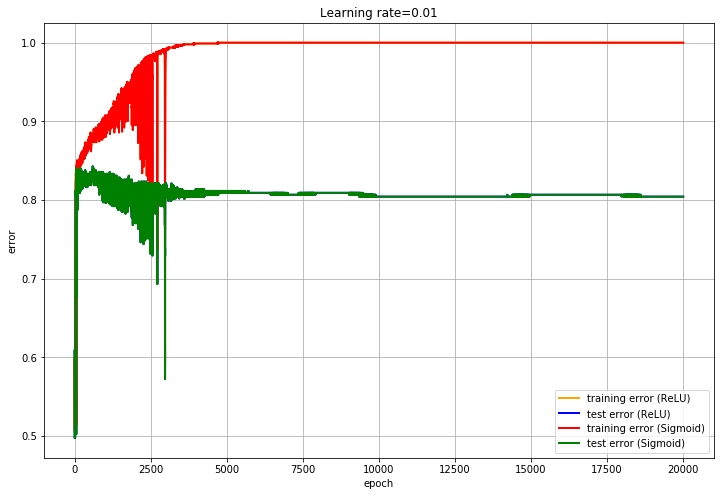

In [113]:
# =========Write your code below ==============

err_tst5, err_trn5, loss_trn, parameters = nn_model1(X_trn, X_tst, Y_trn, Y_tst, num_hidden, num_op, epochs, 'Sigmoid', lr1)

# =============================================
# Classification errors for learning rate = 0.01, Relu Activation, n_hidden = 20
plt.figure(5, figsize=(12, 8))
plt.plot(range(epochs), err_trn, '-', color='orange',linewidth=2, label='training error (ReLU)')
plt.plot(range(epochs), err_tst, '-b', linewidth=2, label='test error (ReLU)')

# Classification errors for learning rate = 0.01, Sigmoid Activation, n_hidden = 20
plt.plot(range(epochs), err_trn5, '-', color='red',  linewidth=2, label='training error (Sigmoid)')
plt.plot(range(epochs), err_tst5, '-b', color='green', linewidth=2, label='test error (Sigmoid)')

plt.title('Learning rate=0.01')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(loc='best')
plt.grid()
plt.show()

### Justification
The lines are overlapped. In this experiment, with both learning rate to be 0.001, the results seems to be very close(almost the same). Thus, the effect of ReLU and Sigmoid is very close in this experiment. 